In [2]:
import os
import sys , time , traceback  , itertools , ipdb
import datetime as dt
from pprint import pprint
from tqdm import tqdm
import warnings , ipdb
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl

#plt.style.use('ggplot')

import tsalib

In [3]:
%matplotlib notebook

In [4]:
warnings.filterwarnings('ignore')

In [5]:
# fb_df = (pd.read_csv('/home/vlad/data/AMZN_und.csv',parse_dates=['last'])
#          .drop_duplicates()
#         .set_index('last'))

# fb_df.head()

In [6]:
def eval_model(TS,sim_prc,print_model,model,horizon):
    prev_month_vola =  np.sqrt( np.sum(
            [np.power(x-TS.rets[-(horizon*2):-horizon].values.mean(),2) for x in TS.rets[-(2*horizon):-horizon].values]
                                                            ) )

    var_sim = tsalib.vola_estimation(data=TS.iloc[:-horizon],horizon=horizon,model=model,print_model=print_model,sim_prc=sim_prc) ; var_sim

    real_vola =  np.sqrt( np.sum(
            [np.power(x-TS.rets[-horizon:].values.mean(),2) for x in TS.rets[-horizon:].values]
                                                            ) )
    return {'return':
                    {'prev_month_vola': round(prev_month_vola,2)
                        , 'expected_var':round(var_sim['expected_var'],2)
                     , 'expected_values':round(var_sim['values'],2)
                       ,'real_vola':round(real_vola,2)
                    }
            ,'stats':
                    {'dummy_error' : round((prev_month_vola- real_vola) #/ real_vola
                                           ,2)
                     ,'arch_error' : round((var_sim['expected_var']- real_vola) #/ real_vola 
                                           ,2 )
                
                    }
           }

def get_data(date,ticker,data_source,horizon):
    if data_source=='web':
        start = '2010-01-01'
        end = date
        end_horizon =dt.datetime.strftime(dt.datetime.strptime(end,'%Y-%m-%d') + dt.timedelta(days=horizon)
                             ,'%Y-%m-%d')

        get_px = lambda x: web.DataReader(x, 'yahoo', start=start, end=end)

        # symbols = ['SPY','TLT','MSFT']
        # # raw adjusted close prices
        # data = pd.DataFrame({sym:get_px(sym)['Adj Close'] for sym in symbols})

        ticker_data = get_px(ticker)
        ticker_data['vola'] = 100*(ticker_data.High - ticker_data.Low)/ticker_data['Adj Close']

        ticker_data['rets'] = 100* ticker_data['Adj Close'].pct_change()
        ticker_data = ticker_data.dropna()
    else:
        pass
            #ticker_data = get_px(ticker)
        # log returns
        #lrets = np.log(ticker_data['Adj Close']/ticker_data['Adj Close'].shift(1)).dropna()
        
    return ticker_data

def test_prediction(date,ticker,sim_prc,data_source,model,print_model):
    
    ticker_data = get_data(date,ticker,data_source)

    return eval_model(TS=ticker_data,sim_prc=sim_prc,print_model=print_model,model=model,horizon=horizon)

In [7]:
data = get_data(date='2018-09-01',ticker='SPY',data_source='web',horizon=22)

In [7]:
def main():
    res = eval_model(data,sim_prc=0.94,print_model=False,model='GARCH',horizon=22)
    #res = test_prediction(date='2018-09-01',ticker='SPY',sim_prc=0.50,print_model=False,model='GARCH',data_source='web')
    pprint(res)
main()

Solving best GARCH model ...


100%|██████████| 16/16 [00:47<00:00,  3.23s/it]


best parameters:  (4, 2) At index: 13


IndexError: index 0 is out of bounds for axis 0 with size 0

In [20]:
#TS plot diff
# tsplot(data.MSFT.shift(1))

In [21]:
#tsplot(lrets.SPY)

In [22]:
# _ = tsplot(res_tup[2].resid**2, lags=30)
#Squared residuals show autocorrelation. Let's fit a GARCH model and see how it does. 

ADF Statistic: -24.431387
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<IPython.core.display.Javascript object>


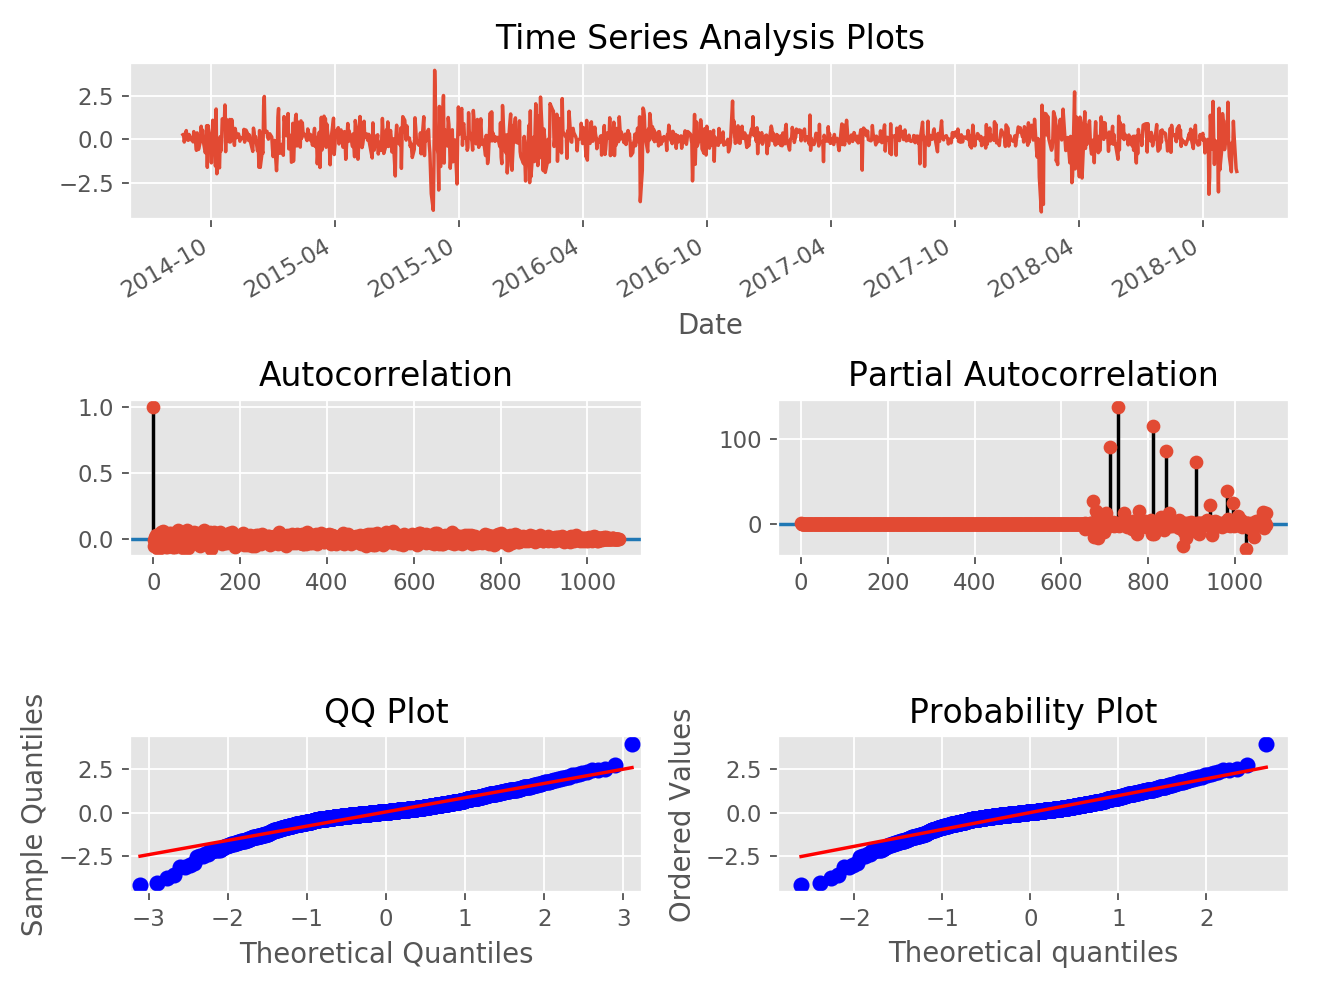

In [7]:
#fig, ax = plt.subplots(1,1)
windowLength = 1095
horizon = 22
TS = rets[-windowLength:-horizon].copy()
n=2

result = adfuller(TS)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


tsalib.tsplot(TS);

In [24]:
# res_tup = tsalib.get_best_arma(TS)
# order = res_tup[1]
# model = res_tup[2]
# p_ = order[0] +n
# o_ = order[1]
# q_ = order[2] +n

# # res = (arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
# #                             .fit(update_freq=5, disp='off')
# #                           )


# #signal = backtest_volamodel(lTS = lrets.SPY)

Solving best ARCH model ...


100%|██████████| 16/16 [00:07<00:00,  2.04it/s]


<IPython.core.display.Javascript object>


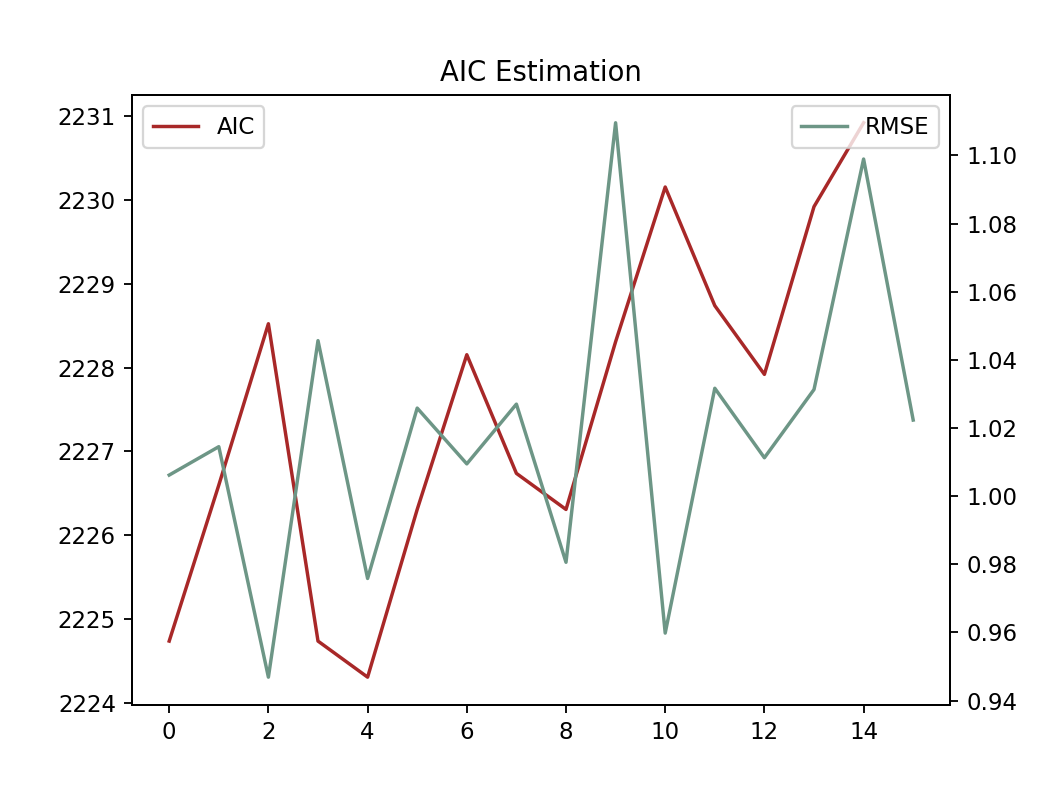

best parameters:  (1, 3) At index: 2


In [25]:



params_factor_grid , best_params = tsalib.find_arch(TS=TS
                                                    ,true_variance=snp500vola.vola.values
                                                    ,horizon=horizon
                                                    ,,print_model=True)



<IPython.core.display.Javascript object>


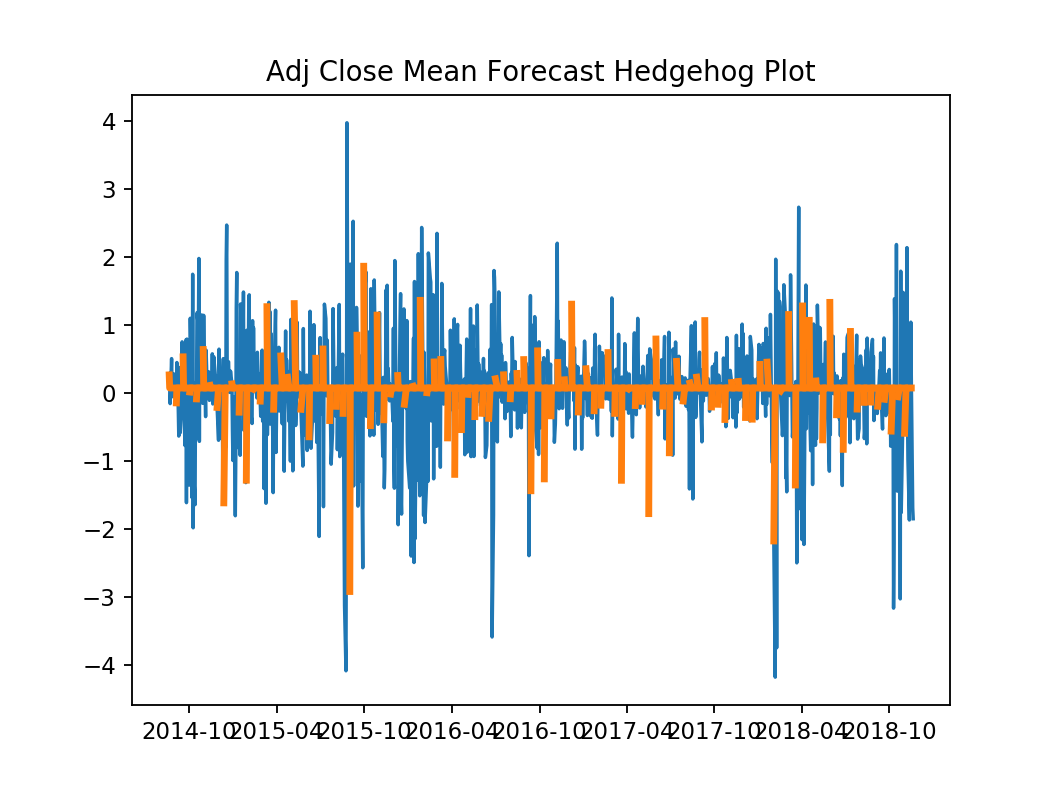

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    Adj Close   R-squared:                      -0.002
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                            GARCH   Log-Likelihood:               -1106.30
Distribution:      Standardized Student's t   AIC:                           2226.60
Method:                  Maximum Likelihood   BIC:                           2261.45
                                              No. Observations:                 1073
Date:                      Tue, Apr 02 2019   Df Residuals:                     1066
Time:                              19:29:58   Df Model:                            7
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [35]:
res_final = (arch_model(TS, p=best_params[0], o=0, q=best_params[1], dist='StudentsT',vol='GARCH')
                                .fit(update_freq=5, disp='off')
            )


forecast  = (res_final.forecast(horizon=horizon, start=None, align='origin', method='simulation')
            )

f = res_final.hedgehog_plot(type='mean')
print(res_final)


<IPython.core.display.Javascript object>


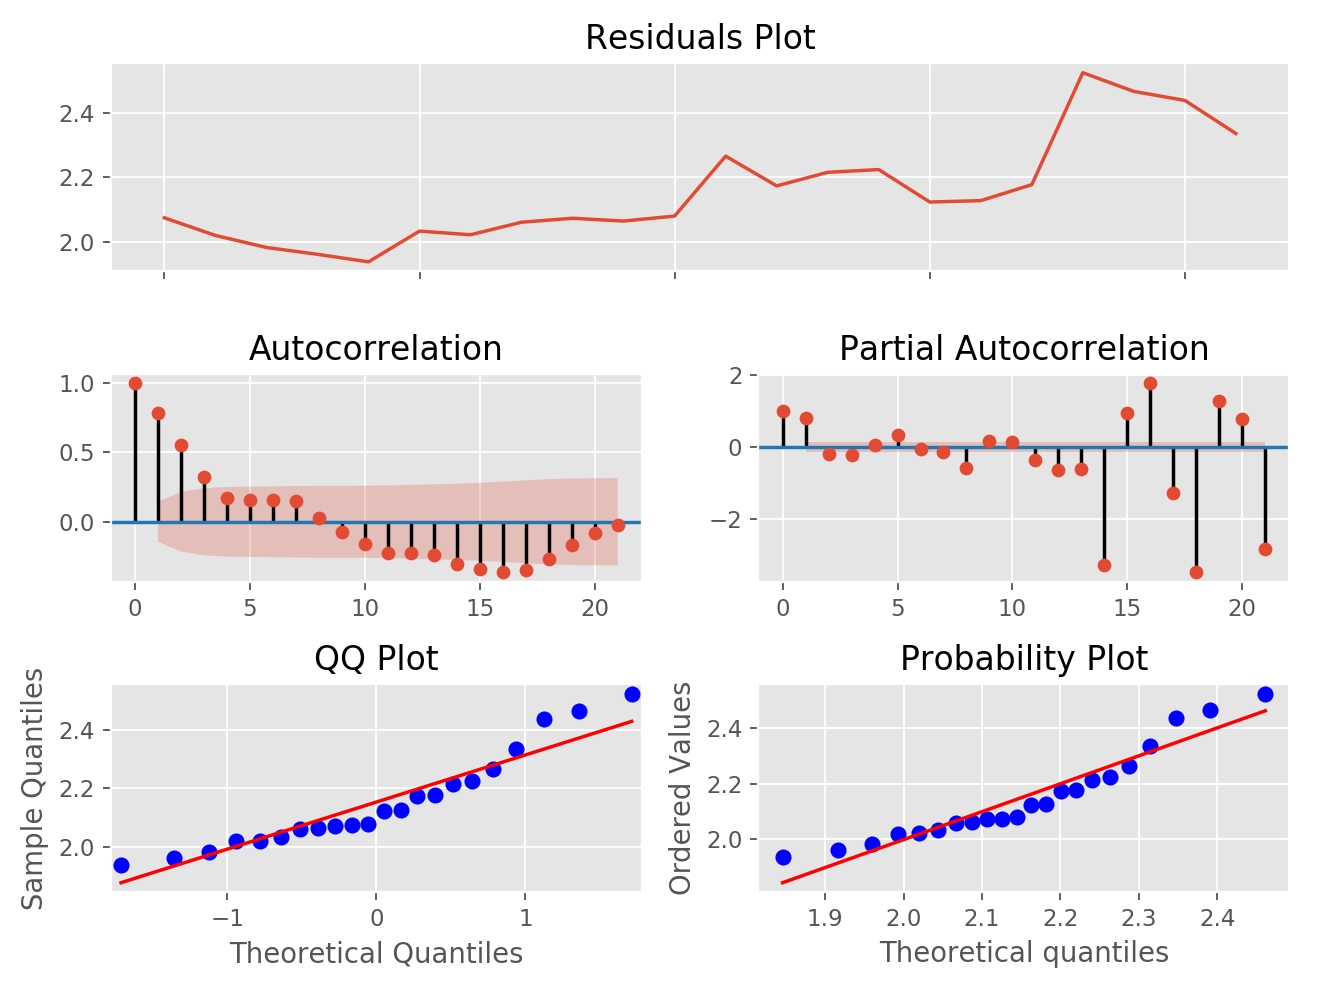

In [36]:
forecast  = (res_final.forecast(horizon=horizon, start=None, align='origin', method='simulation')
                          # .mean['h.1']
                          #.iloc[-1]              
                          )

tsalib.tsplot(forecast.residual_variance.iloc[-1],title='Residuals Plot')

#snp500vola



<IPython.core.display.Javascript object>


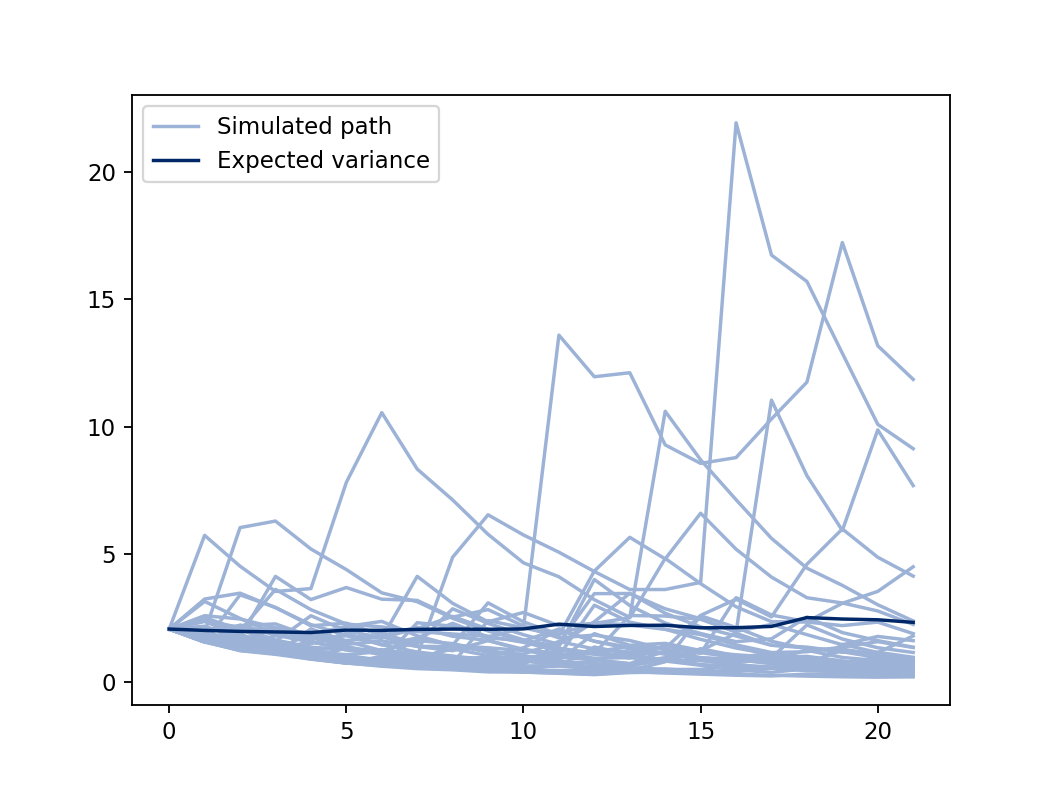

In [37]:
sims = forecast.simulations

simulated_path = sims.residual_variances[-1,:] #/100
expected_variance =  forecast.variance.iloc[-1].values #/100
true_variance = snp500vola.loc[start:end].iloc[-horizon:]
#expected_means = 

dti = pd.DatetimeIndex(start=TS.index[-1] + dt.timedelta(days=1)
                                                        ,end=TS.index[-1] + dt.timedelta(days=horizon+12)
                                                        ,freq='D').to_series().dt.dayofweek

dti = dti[(dti!=5) & (dti!=6)].index

expected_variance_ts = pd.Series(expected_variance,
                                 index=true_variance.index)
                                

most_var_sim_ts = pd.Series(tsalib.variance_quantiles(simulated_path,prc=0.51),
                                 index=true_variance.index)

fig, ax = plt.subplots(1,1)
lines = plt.plot(simulated_path[::30].T, color='#9cb2d6')
lines[0].set_label('Simulated path')
line = plt.plot(expected_variance, color='#002868')
line[0].set_label('Expected variance')
legend = plt.legend()


<IPython.core.display.Javascript object>


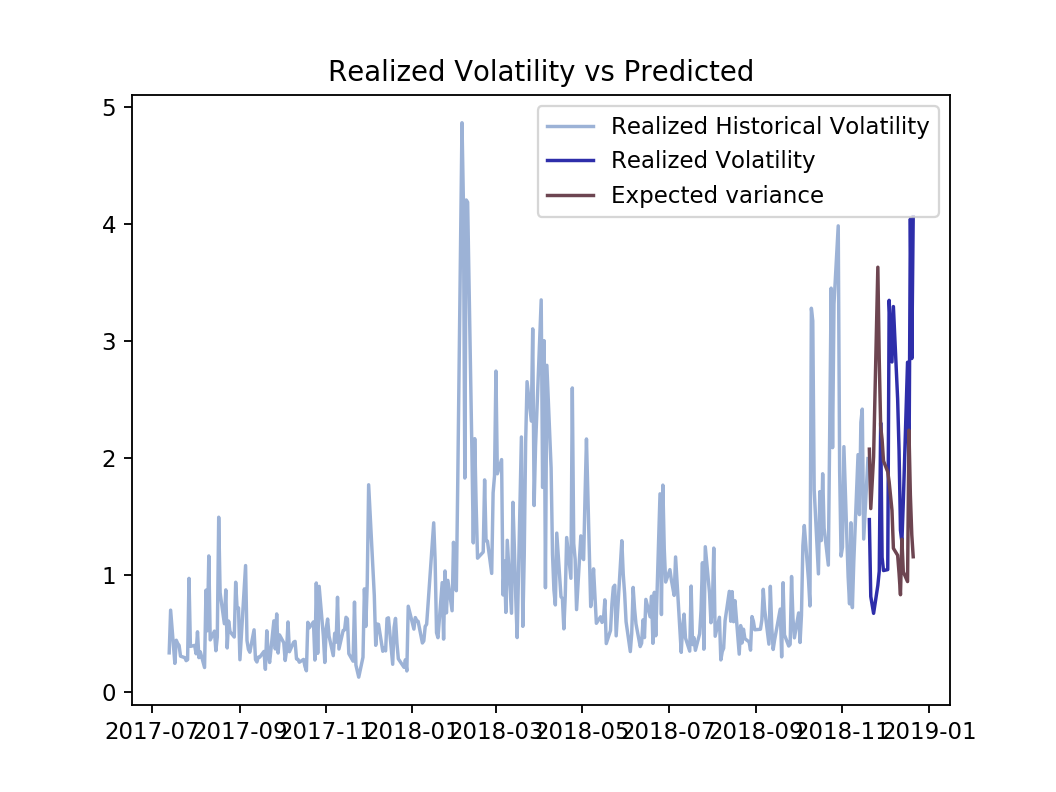

In [39]:
fig, ax = plt.subplots(1,1)
lines = plt.plot(snp500['vola'].loc[start:end].iloc[-365:-horizon], color='#9cb2d6')
lines[0].set_label('Realized Historical Volatility')

line = plt.plot(true_variance, color='#2e2eaa')
line[0].set_label('Realized Volatility')

#line = plt.plot(expected_variance_ts, color='#6d4551')
line = plt.plot(most_var_sim_ts, color='#6d4551')
line[0].set_label('Expected variance')


plt.title('Realized Volatility vs Predicted')
legend = plt.legend()

In [43]:
np500_true = snp500.loc[most_var_sim_ts.index]
expect_m_var = np.sum([np.power(x-most_var_sim_ts.values.mean(),2) for x in most_var_sim_ts.values]) *100/ np500_true.iloc[0,1]
#true_m_var = np.sum([np.power(x-true_variance.vola.values.mean(),2) for x in true_variance.vola.values]) *100/ np500_true.iloc[0,1]
true_m_var =  np.abs((np500_true.iloc[0,1] - np500_true.iloc[-1,0])) *100/ np500_true.iloc[0,1]
print('Expected monthly variance:',round(expect_m_var,2),'%\nTrue monthly variance:',round(true_m_var,2),'%')

Expected monthly variance: 3.63 %
True monthly variance: 5.11 %
